# Setup
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [116]:
import pandas as pd

def load_housing_data(data_dir, file_name):
    csv_path = os.path.join(data_dir, file_name)
    return pd.read_csv(csv_path)

train_csv = load_housing_data('.', 'train.csv')
test_csv = load_housing_data('.', 'test.csv')

In [3]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Note
 -  Only 714/891 have valid age values.
 -  Only 204/891 have valid cabin values.
 -  Only 889/891 have valid Embarked values.
 
 We will need to fill these with some defaults or ignore these data points.

In [5]:
train_csv['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Saving figure attribute_histogram_plots


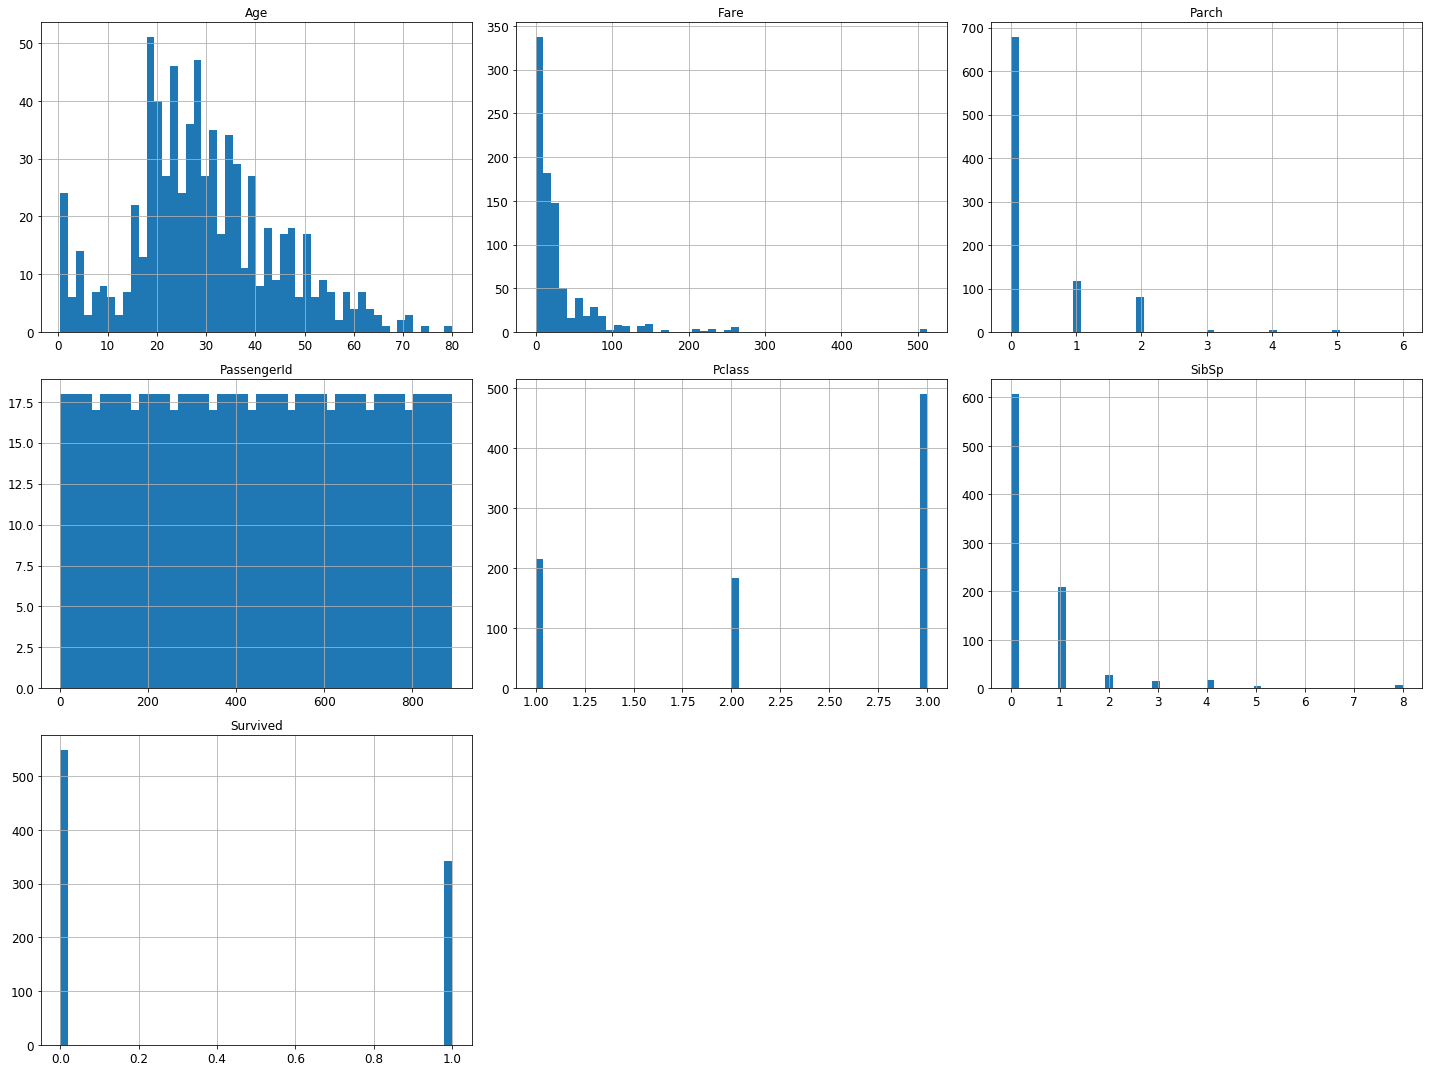

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
train_csv.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

# Correlations

In [9]:
corr_matrix = train_csv.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Saving figure scatter_matrix_plot


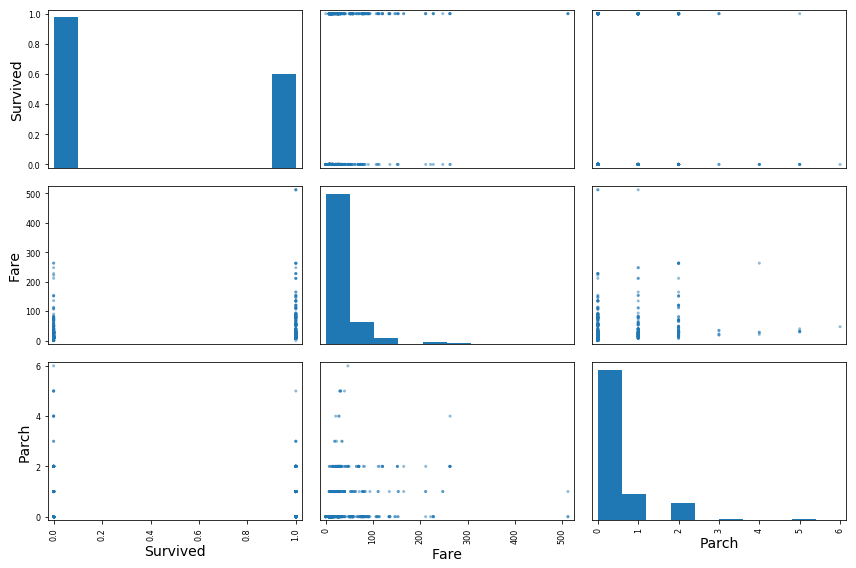

In [10]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

#attributes = ['Survived', 'Fare', 'Parch', 'SibSp', 'Age', 'Pclass']
attributes = ['Survived', 'Fare', 'Parch']
scatter_matrix(train_csv[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Prepare the data for Machine Learning Algorithms

In [11]:
train_data = train_csv.drop("Survived", axis=1) # drop labels for training set
train_labels = train_csv["Survived"].copy()

In [12]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Separate the numerical and string values.

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

# Replace missing categorical values by their median values

In [14]:
from sklearn.pipeline import Pipeline

#num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
#cat_attribs = ['Sex', 'Cabin', 'Embarked']
cat_attribs = ['Sex', 'Embarked']

def get_mode_value(train_data, cat_attr_name):
    attr_values = train_data[cat_attr_name]
    counts = attr_values.value_counts()
    return np.argmax(counts)

embarked_mode_value = get_mode_value(train_data, 'Embarked')
train_data["Embarked"].fillna(embarked_mode_value, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


# Handle numerical values.

In [15]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, Imputer

num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Sex', 'Embarked']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

train_prepared = full_pipeline.fit_transform(train_data)
train_prepared.shape


(891, 10)

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
score = cross_val_score(log_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.7878787878787878, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7777777777777778, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7946127946127947, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.78675645342312006

# Logistic Regression with polynomial features

In [17]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
log_reg = LogisticRegression()

pipeline_reg = Pipeline([('poly', poly), ('log', log_reg)])
score = cross_val_score(pipeline_reg, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.8047138047138047, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8417508417508418, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8181818181818182, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.82154882154882169

In [18]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
log_reg = LogisticRegression()

pipeline_reg = Pipeline([('poly', poly), ('log', log_reg)])
score = cross_val_score(pipeline_reg, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.7744107744107744, total=   0.1s
[CV]  ................................................................
[CV] ....................... , score=0.8215488215488216, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8047138047138047, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.80022446689113347

# SVM

In [19]:
from sklearn import svm
svm_clf = svm.SVC()
score = cross_val_score(svm_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.8114478114478114, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8417508417508418, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8316498316498316, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.82828282828282829

In [20]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
svm = svm.SVC()

pipeline_reg = Pipeline([('poly', poly), ('svm', svm)])
score = cross_val_score(pipeline_reg, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.8080808080808081, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8316498316498316, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8114478114478114, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.81705948372615034

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)
score = cross_val_score(rf_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ........................ , score=0.797979797979798, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8181818181818182, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8249158249158249, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.8136924803591471

# Evaluate Linear Model further

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
score = cross_val_score(log_clf, train_prepared, train_labels, cv=3, verbose=3)
m = log_clf.fit(train_prepared, train_labels)
m.coef_

[CV]  ................................................................
[CV] ....................... , score=0.7878787878787878, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7777777777777778, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7946127946127947, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([[-0.89915986, -0.49611521, -0.34867715, -0.06905913,  0.10362421,
         1.30568605, -1.36411179,  0.13402492,  0.07320447, -0.26565514]])

In [23]:
import statsmodels.api as sm
logit_model = sm.Logit(train_labels, train_prepared)
result = logit_model.fit()
print(result.summary())

/anaconda/envs/tensorflow/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.440810
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Dec 2017   Pseudo R-squ.:                  0.3380
Time:                        10:18:43   Log-Likelihood:                -392.76
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.073e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9198      0.120     -7.665      0.000      -1.155      -0.685
x2            -0.5086      0.

/anaconda/envs/tensorflow/lib/python3.5/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/anaconda/envs/tensorflow/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/envs/tensorflow/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/envs/tensorflow/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Feature Importance

__Important Features__

-  X1 (Pclass), X2 (Age), X3 (SibSp).

__Unimportant Features__

-  X4 (Parch), X5 (Fare)

In [70]:
#num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
#cat_attribs = ['Sex', 'Embarked']
log_clf = LogisticRegression()
m = log_clf.fit(train_prepared, train_labels)
predictions = log_clf.predict(train_prepared)
len(train_csv[predictions != train_labels][(train_csv.Survived == 0) & (train_csv['Cabin'].isnull())])/len(train_csv[predictions != train_labels][(train_csv.Survived == 0)])

/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.7792207792207793

In [72]:
len(train_csv[predictions != train_labels][(train_csv.Survived == 1) & (train_csv['Cabin'].isnull())])/len(train_csv[predictions != train_labels][(train_csv.Survived == 1)])

/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.6862745098039216

In [48]:
print('False Negatives : ', len(train_csv[predictions != train_labels][(train_csv.Survived == 1)]))
print('False Positives : ', len(train_csv[predictions != train_labels][(train_csv.Survived == 0)]))

False Negatives :  102
False Positives :  77


/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Feature ranking:
1. feature 6 (0.424294)
2. feature 5 (0.176729)
3. feature 0 (0.158994)
4. feature 4 (0.109489)
5. feature 1 (0.066376)
6. feature 3 (0.015873)
7. feature 7 (0.014888)
8. feature 2 (0.012971)
9. feature 9 (0.012789)
10. feature 8 (0.007596)


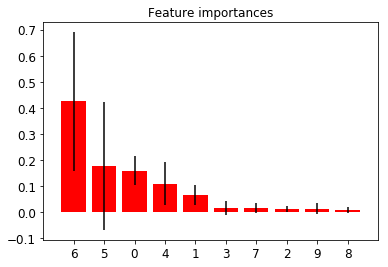

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)
rf_clf.fit(train_prepared, train_labels)
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_prepared.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_prepared.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_prepared.shape[1]), indices)
plt.xlim([-1, train_prepared.shape[1]])
plt.show()

# 78% of True Negatives have null cabins, vs 69% for True Positives

In [90]:
# Add a function which is an indicator of null cabin.
cabin_null = train_csv['Cabin'].isnull().apply(lambda x: 1 if x else 0)

numpy.ndarray

In [108]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, Imputer

class AddNullColumnIndicator(BaseEstimator, TransformerMixin):
    def __init__(self,  column_name, output_column_name):
        self.column_name = column_name
        self.output_column_name = output_column_name

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        cabin_null = X[self.column_name].isnull().apply(lambda x: 1 if x else 0)
        X.loc[:, self.output_column_name] = cabin_null
        return X

class ReplaceCategoricalNullsByMode(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        attr_values = X[self.column_name]
        counts = attr_values.value_counts()
        mode_value = np.argmax(counts)
        X[self.column_name].fillna(mode_value, inplace=True)
        return X

In [109]:
#num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_cabin_null']
num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attribs = ['Sex', 'Embarked']

# Pipeline for numerical attributes.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Pipeline for categorical attributes.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

# Union of the numerical and categorical attributes.
union_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])



#full_pipeline = Pipeline([
#    ('null_cabin', AddNullColumnIndicator('Cabin', 'is_cabin_null')),
#    ('embarked_mode', ReplaceCategoricalNullsByMode('Embarked')),
#    ('union_pipeline', union_pipeline)
#])
full_pipeline = Pipeline([
    ('embarked_mode', ReplaceCategoricalNullsByMode('Embarked')),
    ('union_pipeline', union_pipeline)
])
train_prepared = full_pipeline.fit_transform(train_csv)


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)
score = cross_val_score(rf_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ........................ , score=0.797979797979798, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8181818181818182, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8249158249158249, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.8136924803591471

In [123]:
train_csv = load_housing_data('.', 'train.csv')
num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_cabin_null']
cat_attribs = ['Sex', 'Embarked']

# Pipeline for numerical attributes.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Pipeline for categorical attributes.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

# Union of the numerical and categorical attributes.
union_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

# null_cabin : Adds a is_null feature for 'Cabin'.
# embarked_mode : Adds the mode of 'Embarked' for nulll fields.
full_pipeline = Pipeline([
    ('null_cabin', AddNullColumnIndicator('Cabin', 'is_cabin_null')),
    ('embarked_mode', ReplaceCategoricalNullsByMode('Embarked')),
    ('union_pipeline', union_pipeline)
])

train_prepared = full_pipeline.fit_transform(train_csv)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)
score = cross_val_score(rf_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.7946127946127947, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8249158249158249, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8047138047138047, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.80808080808080807

# Using is_cabin_null reduced performance from 0.815 to 0.80.

# Try to split the cabin information into 'letter' and 'number'.

In [177]:
train_csv = load_housing_data('.', 'train.csv')

class SplitCabinIndicator(BaseEstimator, TransformerMixin):
    def __init__(self,  column_name='Cabin', letter_output_column='cabin_letter', number_output_column='cabin_number'):
        self.column_name = column_name
        self.letter_output_column = letter_output_column
        self.number_output_column = number_output_column

    def fit(self, X, y=None):
        return self  # nothing else to do

    def extractLetterNumber(self, x):
        parts = x.split()
        for part in parts:
            if len(part) == 1:
                continue
            letter = part[0]
            rest = part[1:]
            if letter.isalpha() and rest.isdigit():
                return (letter, rest)
        return (None, None)
    
    def transform(self, X, y=None):
        cabin_letter = X[self.column_name].apply(lambda x: self.extractLetterNumber(x)[0] if pd.notnull(x) else x)
        cabin_number = X[self.column_name].apply(lambda x: self.extractLetterNumber(x)[1] if pd.notnull(x) else x)
        X.loc[:, self.letter_output_column] = cabin_letter
        X.loc[:, self.number_output_column] = cabin_number
        return X

    
train_csv = load_housing_data('.', 'train.csv')
num_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_number']
cat_attribs = ['Sex', 'Embarked', 'cabin_letter']

# Pipeline for numerical attributes.
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Pipeline for categorical attributes.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

# Union of the numerical and categorical attributes.
union_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

# null_cabin : Adds a is_null feature for 'Cabin'.
# embarked_mode : Adds the mode of 'Embarked' for nulll fields.
full_pipeline = Pipeline([
    ('split_cabin_indicator', SplitCabinIndicator()),
    ('embarked_mode', ReplaceCategoricalNullsByMode('Embarked')),
    ('cabin_letter', ReplaceCategoricalNullsByMode('cabin_letter')),
    ('union_pipeline', union_pipeline)
])

train_prepared = full_pipeline.fit_transform(train_csv)
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,cabin_number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,C,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,C,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,C,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,C,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,46
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,C,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,C,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,C,NaN


In [182]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)
score = cross_val_score(rf_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.8013468013468014, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8249158249158249, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8047138047138047, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.81032547699214363

In [183]:
svm_clf = svm.SVC()
score = cross_val_score(svm_clf, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.7946127946127947, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8215488215488216, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8114478114478114, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.80920314253647596

In [187]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
log_reg = LogisticRegression()

pipeline_reg = Pipeline([('poly', poly), ('log', log_reg)])
score = cross_val_score(pipeline_reg, train_prepared, train_labels, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.7912457912457912, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8215488215488216, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8383838383838383, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.81705948372615034